<a href="https://colab.research.google.com/github/SairamS28/Clustering-Countries-for-Strategic-Aid-Allocation/blob/master/Clustering_Countries_for_Strategic_Aid_Allocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report,accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.feature_selection import RFE
from scipy.stats import uniform
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
import regex as re
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.stats as stats

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Case_study_data/Country-data.csv")

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.describe(include="all")

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


<Axes: >

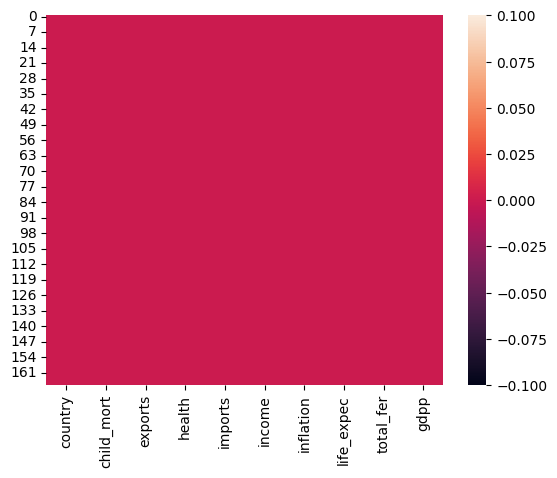

In [ ]:
sns.heatmap(df.isna())#No Missing Data

In [ ]:
df.duplicated().sum() #No Duplicates

0

In [ ]:
df.isna().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


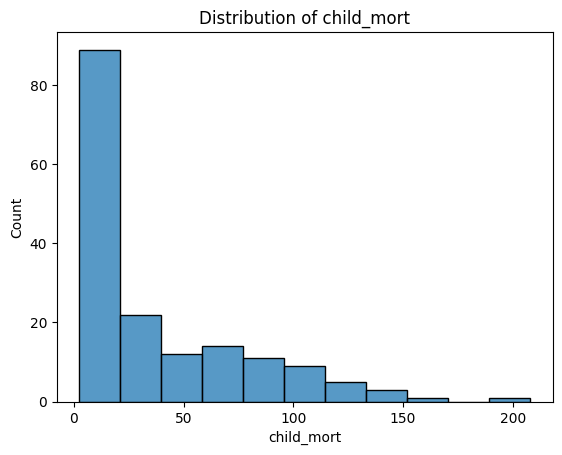

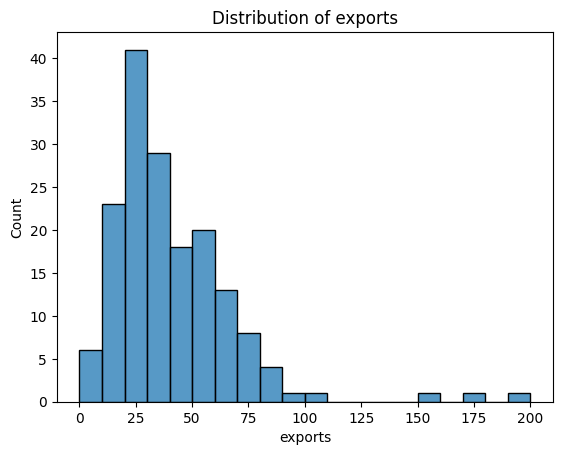

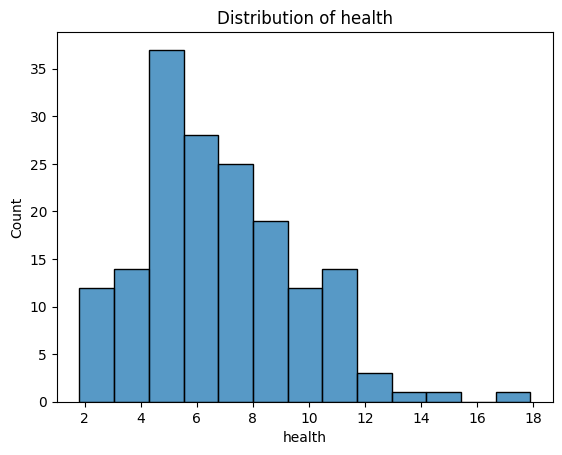

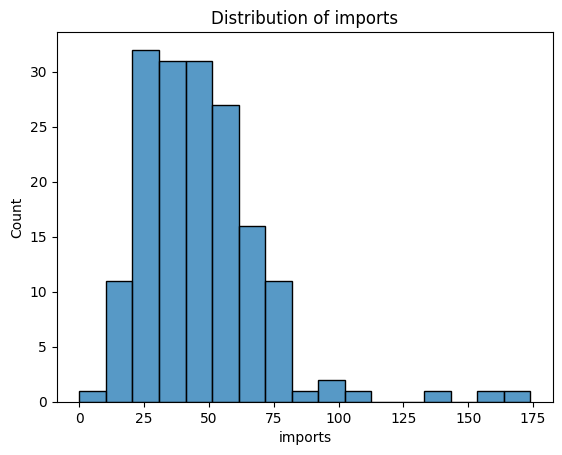

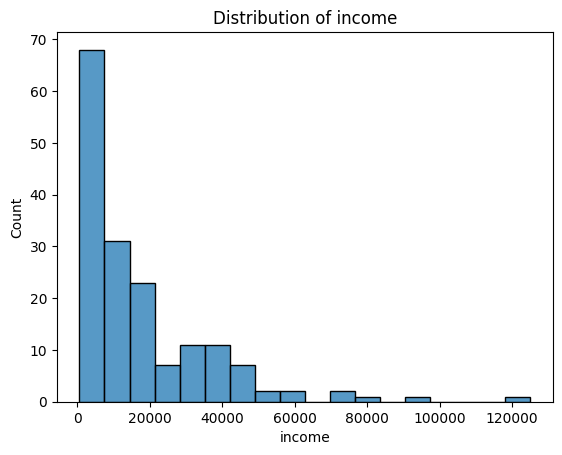

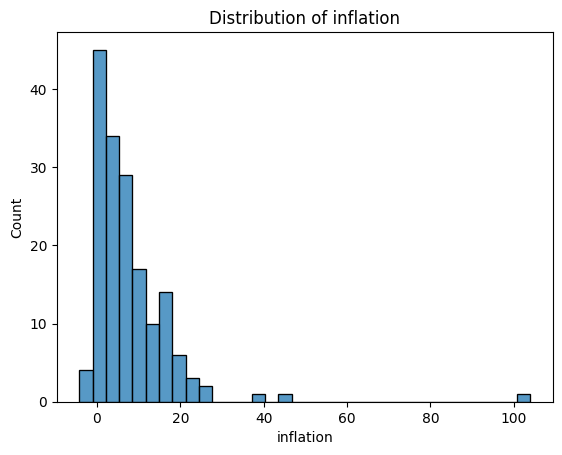

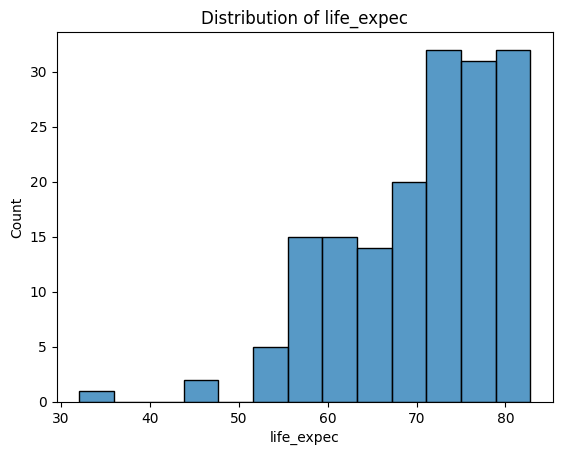

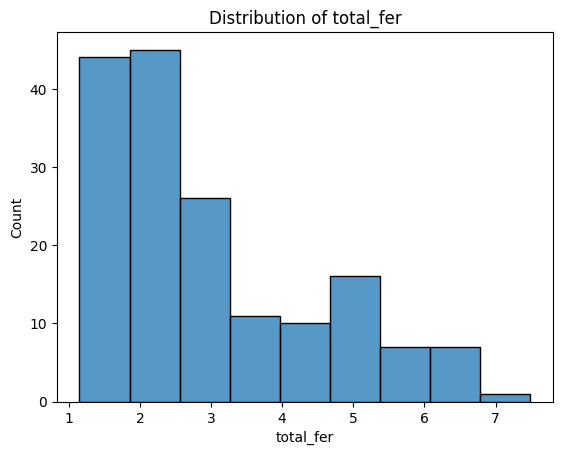

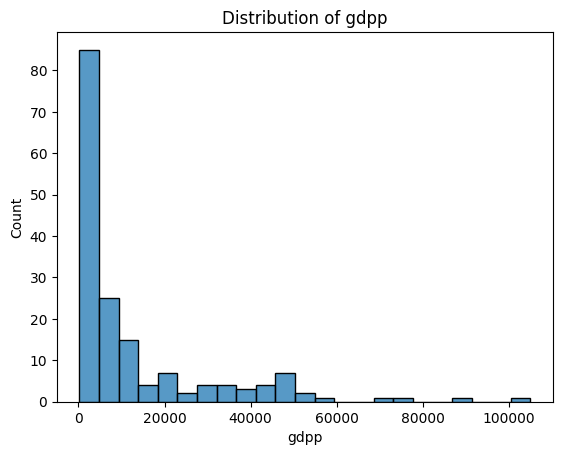

In [ ]:
# Univariate Analysis
for col in df.columns:
  if df[col].dtype != 'object':
    plt.figure()
    sns.histplot(df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

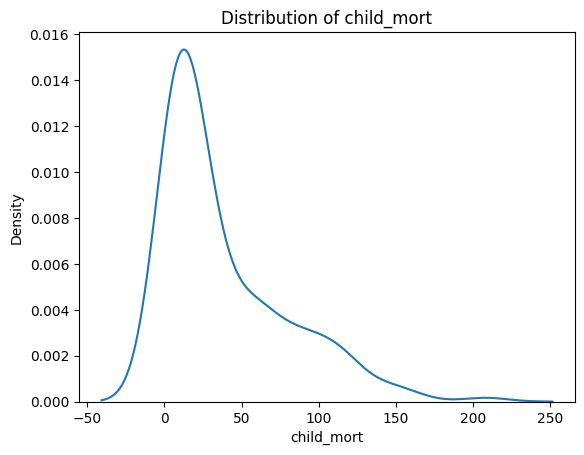

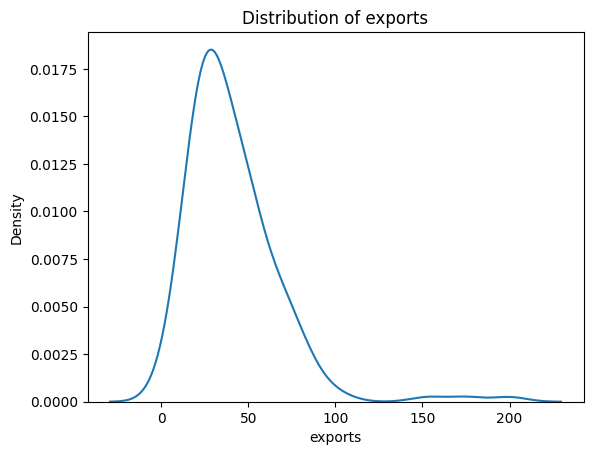

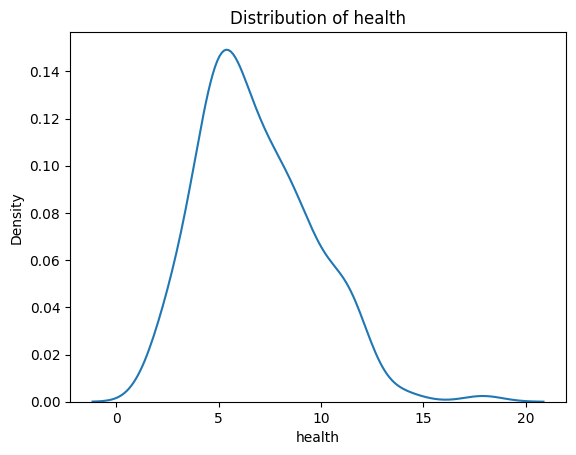

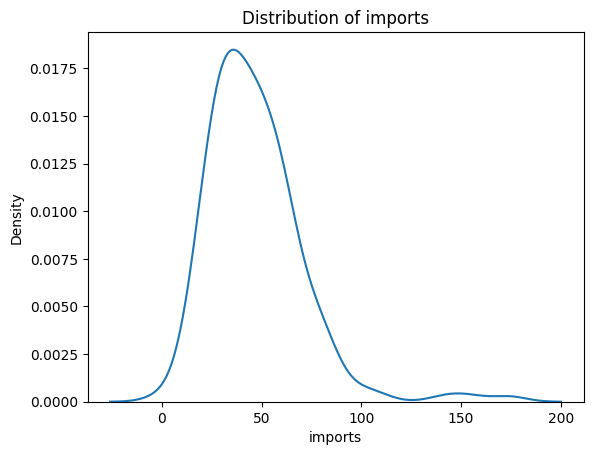

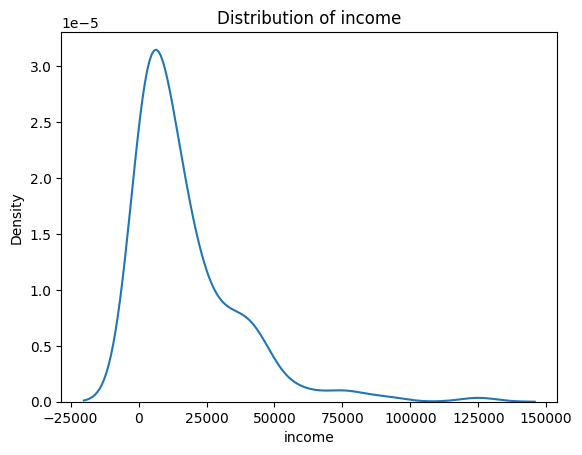

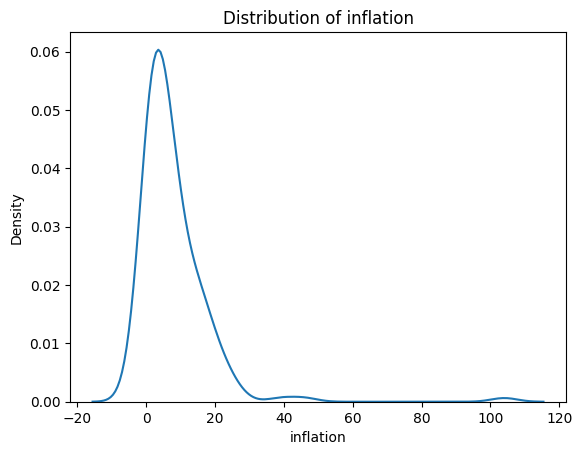

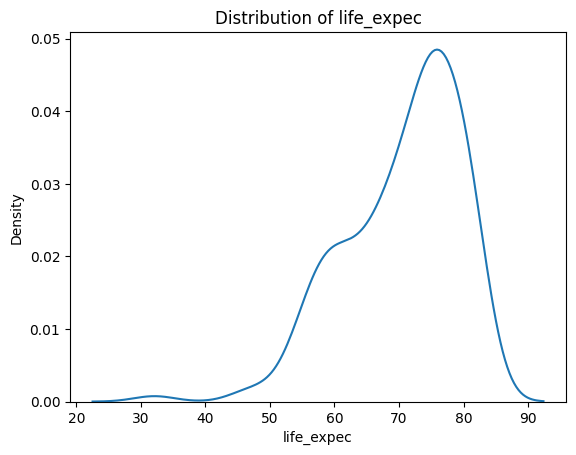

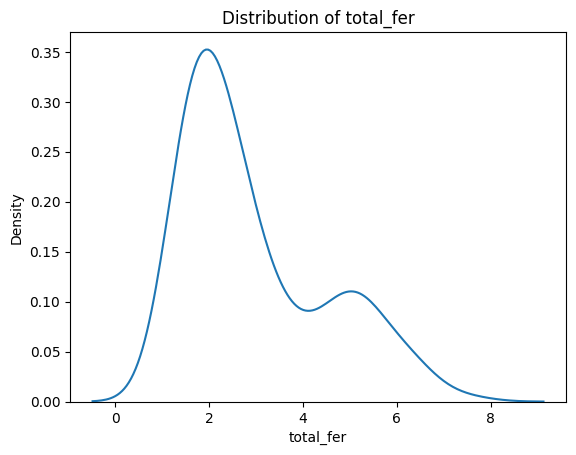

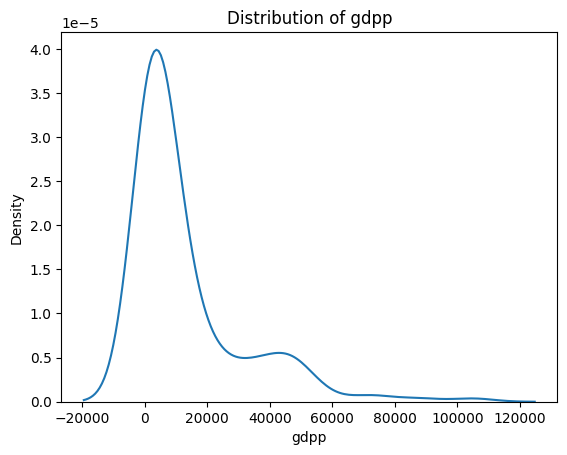

In [ ]:

# Univariate Analysis
for col in df.columns:
  if df[col].dtype != 'object':
    plt.figure()
    sns.kdeplot(df[col])
    plt.title(f"Distribution of {col}")
    plt.show()


In [ ]:
# # Bivariate Analysis
# sns.pairplot(df)
# plt.show()

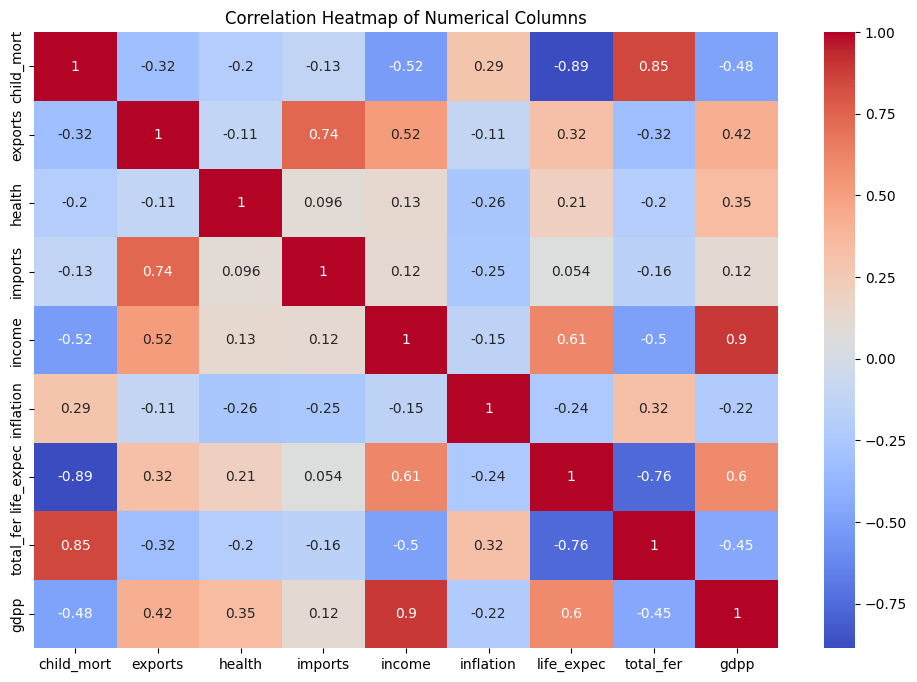

In [ ]:
#Correlation Heatmap
df_corr = df[df.select_dtypes(include=['float', 'int']).columns]
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [ ]:
df['import_export_ratio'] = (df['exports'] / df['imports'])*100

In [ ]:
# Outlier Detection using IQR
for col in df.columns:
  if df[col].dtype != 'object':
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}: {outliers.shape[0]}")


Outliers in child_mort: 4
Outliers in exports: 5
Outliers in health: 2
Outliers in imports: 4
Outliers in income: 8
Outliers in inflation: 5
Outliers in life_expec: 3
Outliers in total_fer: 1
Outliers in gdpp: 25
Outliers in import_export_ratio: 5


In [ ]:
from scipy.stats.mstats import winsorize

# Apply winsorization to cap outliers
for col in df.columns:
  if df[col].dtype != 'object':
    df[col] = winsorize(df[col], limits=[0.05, 0.05])  # Cap 5% of outliers on both ends

# Verify outlier handling (should show reduced or no outliers)
for col in df.columns:
  if df[col].dtype != 'object':
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col} after winsorization: {outliers.shape[0]}")#gdp and import export outliers...


Outliers in child_mort after winsorization: 0
Outliers in exports after winsorization: 0
Outliers in health after winsorization: 0
Outliers in imports after winsorization: 0
Outliers in income after winsorization: 0
Outliers in inflation after winsorization: 0
Outliers in life_expec after winsorization: 0
Outliers in total_fer after winsorization: 0
Outliers in gdpp after winsorization: 25
Outliers in import_export_ratio after winsorization: 0


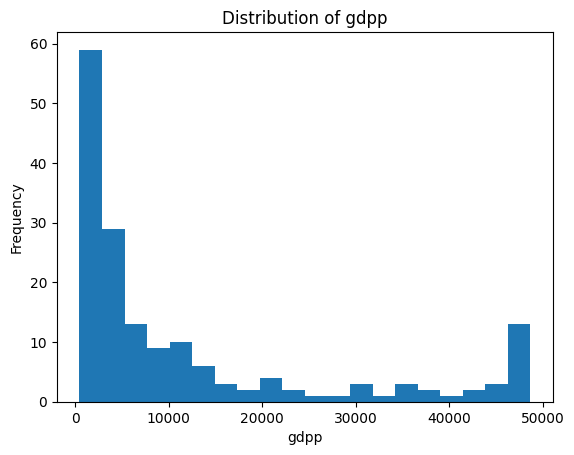

In [ ]:
# Plot histogram of 'gdpp'
plt.hist(df['gdpp'], bins=20)
plt.title('Distribution of gdpp')
plt.xlabel('gdpp')
plt.ylabel('Frequency')
plt.show()

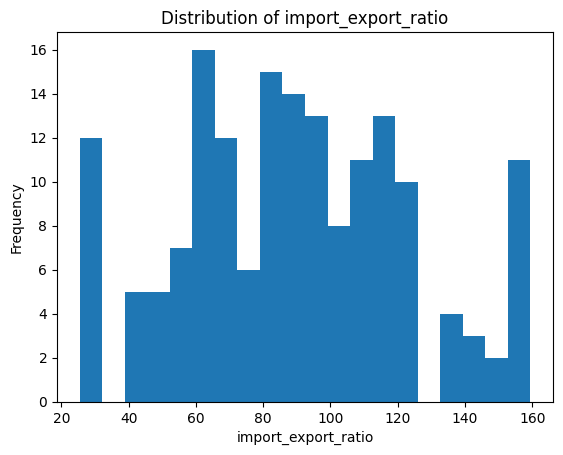

In [ ]:
# Plot histogram of 'import_export_ratio'
plt.hist(df['import_export_ratio'], bins=20)
plt.title('Distribution of import_export_ratio')
plt.xlabel('import_export_ratio')
plt.ylabel('Frequency')
plt.show()

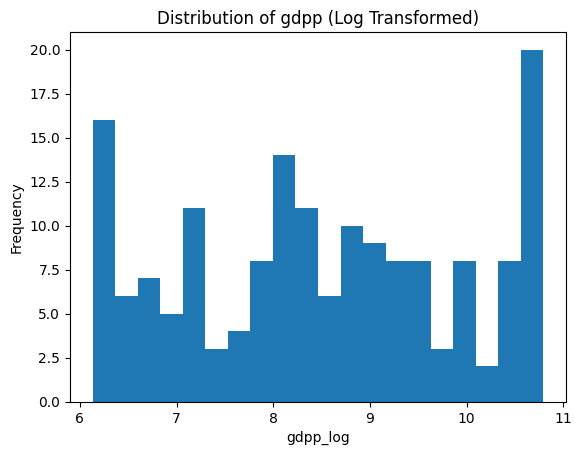

In [ ]:
# Applying log transformation to 'gdpp'
df['gdpp_log'] = np.log1p(df['gdpp'])

# Plot histograms of transformed variables
plt.hist(df['gdpp_log'], bins=20)
plt.title('Distribution of gdpp (Log Transformed)')
plt.xlabel('gdpp_log')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Perform t-test
result = stats.ttest_ind(df['health'], df['life_expec'])

# Print results
print(result)

# Interpret results
alpha = 0.05
if result.pvalue < alpha:
    print("Reject the null hypothesis. Increased health spending (% of GDP) leads to higher life expectancy (Life_expec).")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between health spending and life expectancy.")


TtestResult(statistic=-97.99581526818585, pvalue=4.2279500495762e-247, df=332.0)
Reject the null hypothesis. Increased health spending (% of GDP) leads to higher life expectancy (Life_expec).


In [ ]:
# Calculate Pearson correlation coefficient and p-value
corr, p_value = stats.pearsonr(df['health'], df['life_expec'])

# Print results
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between health spending and life expectancy.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between health spending and life expectancy.")


Pearson correlation coefficient: 0.24947600342499918
P-value: 0.0011488238927149217
Reject the null hypothesis. There is a significant correlation between health spending and life expectancy.


In [ ]:
# Perform t-test
result = stats.ttest_ind(df['total_fer'], df['income'])

# Print results
print(result)

# Interpret results
alpha = 0.05
if result.pvalue < alpha:
    print("Reject the null hypothesis. Countries with higher Total_fertility rates have lower Income per person.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Total_fertility rates and Income per person.")



TtestResult(statistic=-13.709791347305439, pvalue=3.2950919487094535e-34, df=332.0)
Reject the null hypothesis. Countries with higher Total_fertility rates have lower Income per person.


In [ ]:
# Calculate Pearson correlation coefficient and p-value
corr, p_value = stats.pearsonr(df['total_fer'], df['income'])

# Print results
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between Total_fertility rates and Income per person.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between Total_fertility rates and Income per person.")


Pearson correlation coefficient: -0.5883441432027093
P-value: 6.239301897978759e-17
Reject the null hypothesis. There is a significant correlation between Total_fertility rates and Income per person.


In [ ]:
# Perform t-test
result = stats.ttest_ind(df['child_mort'], df['income'])

# Print results
print(result)

# Interpret results
alpha = 0.05
if result.pvalue < alpha:
    print("Reject the null hypothesis. Higher income levels are associated with lower child mortality rates.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between income levels and child mortality rates.")


TtestResult(statistic=-13.680373661937903, pvalue=4.268346375584393e-34, df=332.0)
Reject the null hypothesis. Higher income levels are associated with lower child mortality rates.


In [ ]:
# Calculate Pearson correlation coefficient and p-value
corr, p_value = stats.pearsonr(df['child_mort'], df['income'])

# Print results
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between Child_mortality and Income per person.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between child_mort and Income per person.")


Pearson correlation coefficient: -0.6353145168605605
P-value: 2.925297942217806e-20
Reject the null hypothesis. There is a significant correlation between Child_mortality and Income per person.


In [ ]:
# Perform t-test
result = stats.ttest_ind(df['inflation'], df['gdpp'])

# Print results
print(result)

# Interpret results
alpha = 0.05
if result.pvalue < alpha:
    print("Reject the null hypothesis. Higher inflation rates are associated with lower GDP per capita, indicating economic instability.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between inflation rates and GDP per capita.")


TtestResult(statistic=-10.225772328311542, pvalue=1.6140069109571055e-21, df=332.0)
Reject the null hypothesis. Higher inflation rates are associated with lower GDP per capita, indicating economic instability.


In [ ]:
# Calculate Pearson correlation coefficient and p-value
corr, p_value = stats.pearsonr(df['inflation'], df['gdpp'])

# Print results
print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between gdpp and inflation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between inflation and gdpp.")


Pearson correlation coefficient: -0.33293875847535354
P-value: 1.1011891306983982e-05
Reject the null hypothesis. There is a significant correlation between gdpp and inflation.


ML Model

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              167 non-null    object 
 1   child_mort           167 non-null    float64
 2   exports              167 non-null    float64
 3   health               167 non-null    float64
 4   imports              167 non-null    float64
 5   income               167 non-null    int64  
 6   inflation            167 non-null    float64
 7   life_expec           167 non-null    float64
 8   total_fer            167 non-null    float64
 9   gdpp                 167 non-null    int64  
 10  import_export_ratio  167 non-null    float64
 11  gdpp_log             167 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 15.8+ KB


In [ ]:
# Define a function to categorize countries into regions
def assign_region(country):
  if country in ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']:
    return 'South Asia'
  elif country in ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Timor-Leste', 'Vietnam']:
    return 'Southeast Asia'
  elif country in ['China', 'Hong Kong', 'Japan', 'Macau', 'Mongolia', 'North Korea', 'South Korea', 'Taiwan']:
    return 'East Asia'
  elif country in ['Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan']:
    return 'Central Asia'
  elif country in ['Bahrain', 'Cyprus', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Turkey', 'United Arab Emirates', 'Yemen']:
    return 'Middle East'
  elif country in ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Democratic Republic of the', 'Congo, Republic of the', 'Cote d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']:
    return 'Africa'
  elif country in ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']:
    return 'Europe'
  elif country in ['Antigua and Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belize', 'Bolivia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname', 'Trinidad and Tobago', 'United States', 'Uruguay', 'Venezuela']:
    return 'Americas'
  elif country in ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']:
    return 'Oceania'
  else:
    return 'Other'

# Apply the function to create the 'regions' column
df['regions'] = df['country'].apply(assign_region)


In [ ]:
df.regions.value_counts()

,count
regions,
Africa,43
Europe,40
Americas,26
Middle East,15
Southeast Asia,10
Other,9
South Asia,8
Oceania,8
East Asia,4


In [ ]:
#One Hot Encoding
encoder = OneHotEncoder(sparse=False, drop='first')  # 'drop' avoids dummy variable trap
encoded_regions = encoder.fit_transform(df[['regions']])

# Create a DataFrame from the encoded features
encoded_regions_df = pd.DataFrame(encoded_regions, columns=encoder.get_feature_names_out(['regions']))

# Concatenate the encoded features with the original DataFrame
df = pd.concat([df, encoded_regions_df], axis=1)

# Drop the original 'regions' column
df = df.drop('regions', axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 167 non-null    object 
 1   child_mort              167 non-null    float64
 2   exports                 167 non-null    float64
 3   health                  167 non-null    float64
 4   imports                 167 non-null    float64
 5   income                  167 non-null    int64  
 6   inflation               167 non-null    float64
 7   life_expec              167 non-null    float64
 8   total_fer               167 non-null    float64
 9   gdpp                    167 non-null    int64  
 10  import_export_ratio     167 non-null    float64
 11  gdpp_log                167 non-null    float64
 12  regions_Americas        167 non-null    float64
 13  regions_Central Asia    167 non-null    float64
 14  regions_East Asia       167 non-null    fl

In [ ]:
# Select numerical columns for scaling
numerical_cols = df.select_dtypes(include=['float', 'int']).columns

# Initialize the scaler
scaler = StandardScaler()  # or MinMaxScaler() depending on your preference

# Fit and transform the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


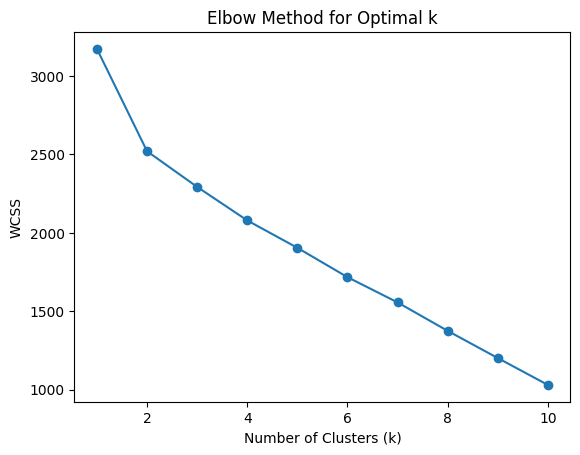

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame with relevant features for clustering

# Select numerical features for clustering
X = df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer','import_export_ratio', 'gdpp_log',
       'regions_Americas', 'regions_Central Asia', 'regions_East Asia',
       'regions_Europe', 'regions_Middle East', 'regions_Oceania',
       'regions_Other', 'regions_South Asia', 'regions_Southeast Asia']]

# Initialize list to store WCSS (Within-Cluster Sum of Squares)
wcss = []

# Try different values of k (number of clusters)
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()


[[-0.78818259  0.6217441   0.5744817   0.46903766  0.68085891 -0.55272302
   0.75044375 -0.87994248  0.23133587  0.7402042  -0.42941491 -0.15665209
  -0.15665209  1.35149381 -0.31414043 -0.22430886 -0.05790791 -0.12874871
   0.09167989]
 [ 1.0285886  -0.50369451 -0.2713856  -0.00297908 -0.80570927  0.29319424
  -1.04303057  1.01357617 -0.60169231 -0.96616599 -0.38563451 -0.052839
  -0.15665209 -0.56121353 -0.25862567  0.22163852  0.25339973  0.29596308
   0.01522275]
 [-0.47600246  0.0230417  -0.2009511  -0.41445751  0.31631996  0.1565853
   0.52616695 -0.37705668  0.48311195  0.44724457  0.82429645  0.20008744
   0.31900062 -0.56121353  0.57611451 -0.05403804 -0.23866719 -0.22430886
  -0.09911542]]


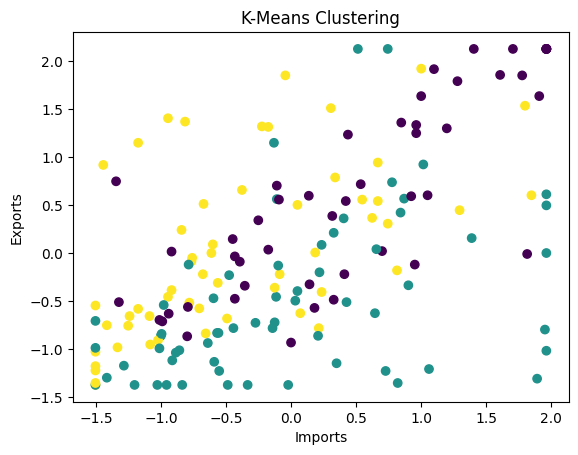

In [ ]:
# Based on the Elbow method, choose the optimal k (let's assume k=3)
optimal_k = 3

# Initialize KMeans with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get cluster labels for each data point
df['Cluster'] = kmeans.labels_

# Print the cluster centers
print(kmeans.cluster_centers_)

# Visualize the clusters (example using two features)
plt.scatter(df['imports'], df['exports'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Imports')
plt.ylabel('Exports')
plt.show()


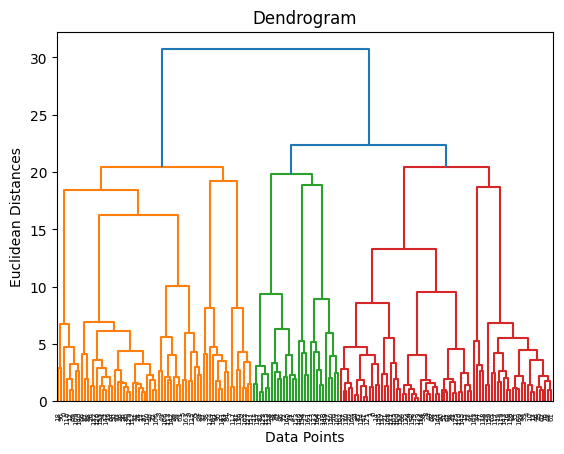

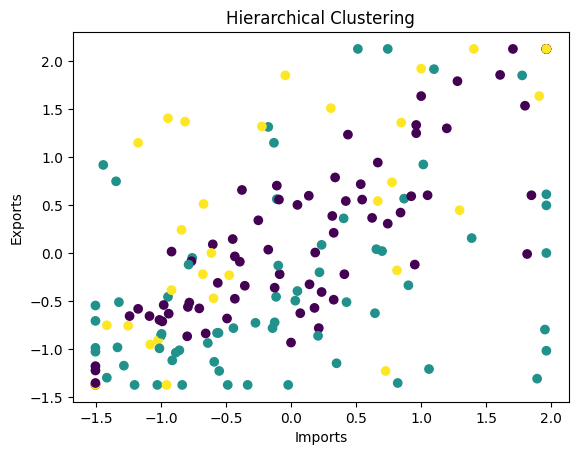

In [ ]:
 # Create a dendrogram to visualize the hierarchical structure
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

# Perform Agglomerative Clustering (choose the number of clusters based on the dendrogram)
# Let's assume we want 3 clusters
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Add cluster labels to your DataFrame
df['Cluster_HC'] = y_hc

# Visualize the clusters (example using two features)
plt.scatter(df['imports'], df['exports'], c=df['Cluster_HC'], cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Imports')
plt.ylabel('Exports')
plt.show()


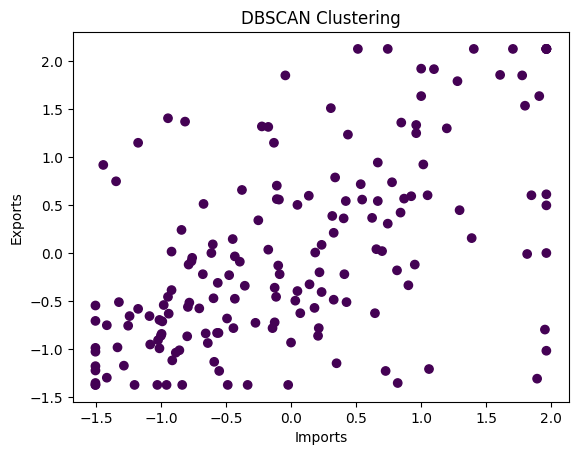

In [ ]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed

# Fit the model to the data
y_dbscan = dbscan.fit_predict(X)

# Add cluster labels to your DataFrame
df['Cluster_DBSCAN'] = y_dbscan

# Visualize the clusters (example using two features)
plt.scatter(df['imports'], df['exports'], c=df['Cluster_DBSCAN'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Imports')
plt.ylabel('Exports')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Coefficient for KMeans
silhouette_kmeans = silhouette_score(X, df['Cluster'])
print("Silhouette Coefficient for KMeans:", silhouette_kmeans)

# Calculate Silhouette Coefficient for Agglomerative Clustering
silhouette_hc = silhouette_score(X, df['Cluster_HC'])
print("Silhouette Coefficient for Hierarchical Clustering:", silhouette_hc)

# Calculate Silhouette Coefficient for DBSCAN (excluding noise points)
core_samples_mask = np.zeros_like(y_dbscan, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels_dbscan = y_dbscan[core_samples_mask]
X_dbscan = X[core_samples_mask]
if len(set(labels_dbscan)) > 1:  # Check if there are at least two clusters (excluding noise)
    silhouette_dbscan = silhouette_score(X_dbscan, labels_dbscan)
    print("Silhouette Coefficient for DBSCAN:", silhouette_dbscan)
else:
    print("Silhouette Coefficient for DBSCAN cannot be calculated as there are less than two clusters (excluding noise).")


Silhouette Coefficient for KMeans: 0.18977211125365087
Silhouette Coefficient for Hierarchical Clustering: 0.18462409237755378
Silhouette Coefficient for DBSCAN cannot be calculated as there are less than two clusters (excluding noise).


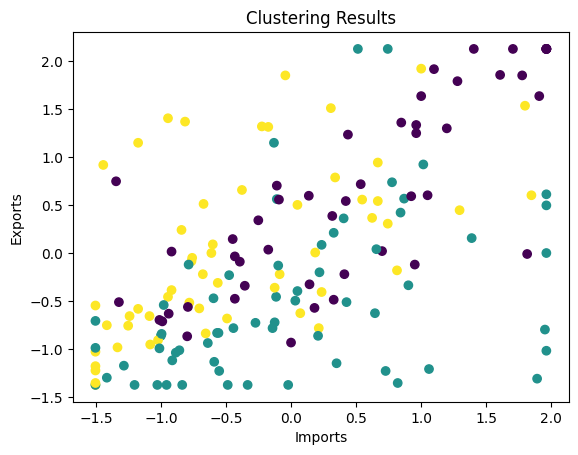

In [ ]:
# Visualize the clusters (example using two features)
plt.scatter(df['imports'], df['exports'], c=df['Cluster'], cmap='viridis')
plt.title('Clustering Results')
plt.xlabel('Imports')
plt.ylabel('Exports')
plt.show()


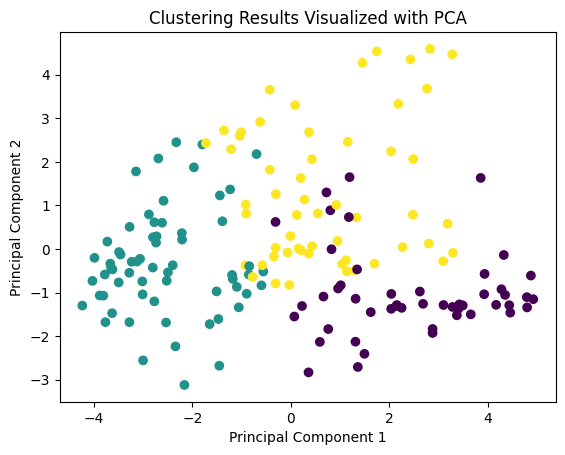

In [ ]:
from sklearn.decomposition import PCA

# Select numerical features for PCA
X = df.select_dtypes(include=['float', 'int'])

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Create a DataFrame from the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = df['Cluster']  # Replace 'Cluster' with the actual column name for cluster labels

# Visualize the clusters using PCA
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('Clustering Results Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Calculate the absolute values of the cluster centers
abs_centers = np.abs(cluster_centers)

# Sort features within each cluster based on their absolute values in the cluster center
ordered_features = []
for i in range(3):  # Assuming optimal_k is the number of clusters
    ordered_features.append(np.argsort(abs_centers[i])[::-1])

# Print the most important features for each cluster
for i in range(3):
    print(f"Cluster {i}:")
    for feature_idx in ordered_features[i]:
        print(f"  - {X.columns[feature_idx]}")


Cluster 0:
  - regions_East Asia
  - total_fer
  - child_mort
  - life_expec
  - import_export_ratio
  - income
  - exports
  - health
  - inflation
  - imports
  - gdpp_log
  - regions_Europe
  - gdpp
  - regions_Middle East
  - regions_Central Asia
  - regions_Americas
  - regions_Other
  - regions_South Asia
  - regions_Oceania
Cluster 1:
  - life_expec
  - child_mort
  - total_fer
  - import_export_ratio
  - income
  - gdpp
  - regions_East Asia
  - exports
  - gdpp_log
  - regions_Other
  - inflation
  - health
  - regions_Europe
  - regions_Oceania
  - regions_Middle East
  - regions_Central Asia
  - regions_Americas
  - regions_South Asia
  - imports
Cluster 2:
  - gdpp_log
  - regions_Europe
  - regions_East Asia
  - life_expec
  - gdpp
  - child_mort
  - import_export_ratio
  - imports
  - total_fer
  - regions_Central Asia
  - income
  - regions_Oceania
  - regions_Other
  - health
  - regions_Americas
  - inflation
  - regions_South Asia
  - regions_Middle East
  - exports


In [ ]:
# Get the features of the given country
country_name = input("Enter a country")  # Replace with the actual country name
country_data = df[df['country'] == country_name][['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer','import_export_ratio', 'gdpp_log',
       'regions_Americas', 'regions_Central Asia', 'regions_East Asia',
       'regions_Europe', 'regions_Middle East', 'regions_Oceania',
       'regions_Other', 'regions_South Asia', 'regions_Southeast Asia']].values

# Predict the cluster for the given country
country_cluster = kmeans.predict(country_data)[0]

# Find countries in the same cluster
similar_countries = df[df['Cluster'] == country_cluster]['country'].tolist()

# Remove the given country from the list of similar countries
similar_countries.remove(country_name)

print(f"Countries similar to {country_name} based on KMeans clustering: {similar_countries}")


Countries similar to India based on KMeans clustering: ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bhutan', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Fiji', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines', 'Rwanda', 'Samoa', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Tonga', 'Uganda', 'Vanuatu', 'Yemen', 'Zambia']


In [ ]:
import pickle
import os
#FIle Path
file_path = '/content/drive/My Drive/Pickle Files/Clustering Countries for Strategic Aid Allocation.pkl'

# Save the KMeans model to the pickle file
with open(file_path, 'wb') as file:
  pickle.dump(kmeans, file)